In [65]:
! pip install xgboost

In [86]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [67]:
# read csv data
data = pd.read_csv("happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [68]:
# how big is data
data.shape

(158, 12)

In [69]:
#Drop the unnecssary columns from dataset

y = data.drop(columns= ['Region'],axis = 1,inplace = True)
y

In [70]:
y = data.drop(columns =['Country'],axis =1,inplace = True)

In [87]:
# check the shape after droping the columns
data.shape

(158, 10)

In [71]:
# stats about data
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [73]:
# seprate the label and features from dataset
x = data.drop(columns = ['Happiness Score'],axis = 1)
y = data['Happiness Score']
x

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [74]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

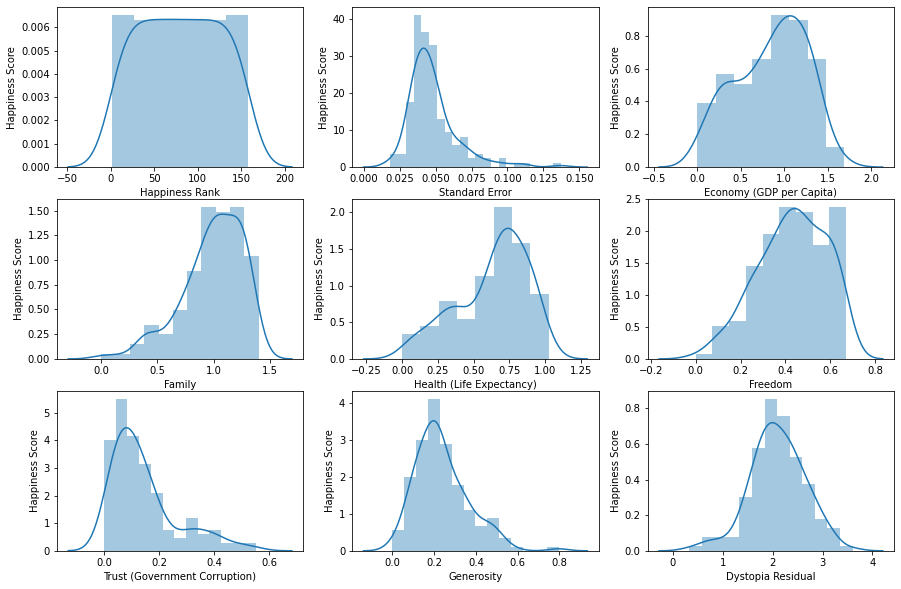

In [48]:
# visualize the relationship using distplot
plt.figure(figsize=(15,10))
pn = 1
for col in x:
    if pn <= 9:
        ax = plt.subplot(3,3,pn)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('Happiness Score',fontsize = 10)
    pn +=1
plt.show()    

### In this graph, data is distributed normally,there is no skewness 

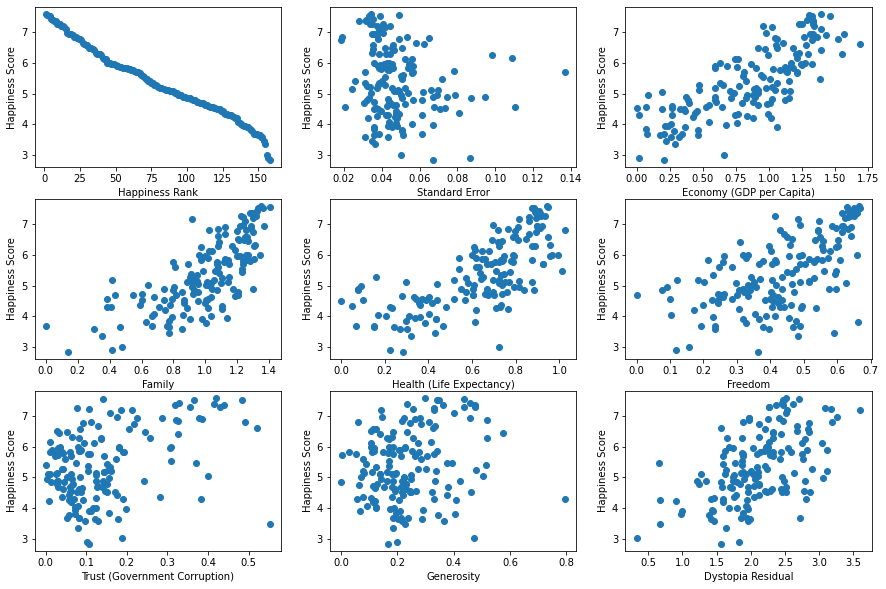

In [88]:
# visualize the relationship using scatter plot
plt.figure(figsize=(15,10))
pn = 1
for col in x:
    if pn <= 9:
        ax = plt.subplot(3,3,pn)
        plt.scatter(x[col],y)
        plt.xlabel(col,fontsize = 10)
        plt.ylabel('Happiness Score',fontsize = 10)
    pn +=1
plt.show()    

### in this graph , all features are follow some trend

In [89]:
# data scaling formula z = (x-mean)/std
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-1.72099989, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [90]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 61)


In [91]:
# import the library

from sklearn.linear_model import LinearRegression

In [92]:
# create the object and train the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
# check the training score
lr.score(x_train,y_train)

0.9999999443710431

In [94]:
# check the testing score
lr.score(x_test,y_test)

0.9999999297002231

In [95]:
# import r2_score metrics
from sklearn.metrics import r2_score

In [98]:
# predict the model
y_pred = lr.predict(x_test)
y_pred

array([4.86721323, 3.78081806, 3.68091809, 4.7386024 , 3.65507382,
       4.55060794, 4.41925668, 5.99516944, 5.33256974, 5.47704984,
       6.57502637, 3.58687434, 4.94879103, 4.88445766, 2.83911754,
       6.57403609, 4.97117433, 4.19426069, 5.83270546, 5.7905687 ,
       5.12418673, 6.79778548, 6.4547103 , 6.94024003, 5.05732045,
       5.19243291, 6.90134175, 4.63344295, 5.81254799, 7.58682819,
       3.84495552, 3.00652138, 6.29819934, 5.70879288, 5.14038138,
       2.90478555, 5.75439784, 4.60970495, 4.56468964, 5.94825351])

In [99]:
r2_score(y_test,y_pred)

0.9999999297002231

In [100]:
# check accuracy score using xgboost
# create object 
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
pred

array([4.879846 , 3.7882059, 3.6941235, 4.689001 , 3.7020457, 4.5532446,
       4.2950435, 6.0143065, 5.2043386, 5.668192 , 6.626825 , 3.5236964,
       4.8806934, 4.8598704, 3.3418412, 6.4324083, 4.866914 , 4.2347355,
       5.7687855, 5.757924 , 5.0916777, 6.6217804, 6.4736204, 6.9406796,
       5.0128126, 5.045846 , 6.8610773, 4.7121067, 5.768639 , 7.558796 ,
       3.795261 , 3.3782716, 6.419774 , 5.7749577, 5.19471  , 3.364007 ,
       5.7275395, 4.574072 , 4.5594773, 5.980007 ], dtype=float32)

In [101]:
r2_score(y_test,pred)

0.9848118974165073